<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/One_Hot_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/appliedcode/mthree-c422/refs/heads/main/Exercises/day-4/Conversion_techniques/carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


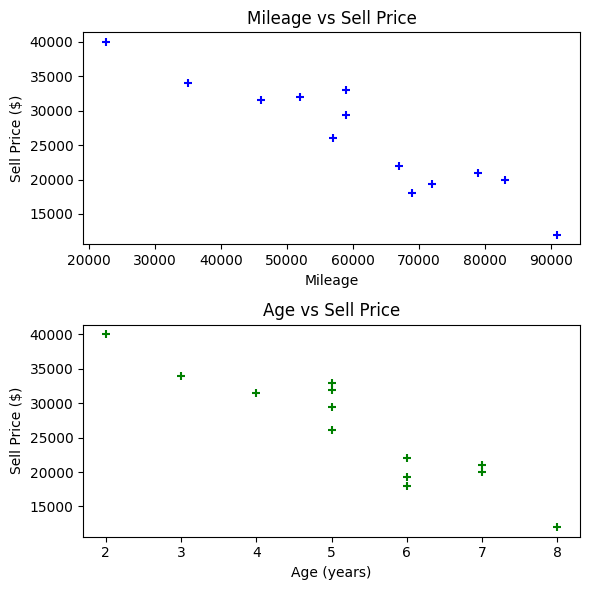

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))
axs[0].scatter(df['Mileage'], df['Sell Price($)'], color='blue', marker='+')
axs[0].set_title('Mileage vs Sell Price')
axs[0].set_xlabel('Mileage')
axs[0].set_ylabel('Sell Price ($)')

axs[1].scatter(df['Age(yrs)'], df['Sell Price($)'], color='green', marker='+')
axs[1].set_title('Age vs Sell Price')
axs[1].set_xlabel('Age (years)')
axs[1].set_ylabel('Sell Price ($)')
plt.tight_layout()
plt.show()


In [5]:
df_dummies = pd.get_dummies(df['Car Model'], drop_first=True)
df_model = pd.concat([df.drop('Car Model', axis=1), df_dummies], axis=1)


In [6]:
X = df_model.drop('Sell Price($)', axis=1)
y = df_model['Sell Price($)']


In [7]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [8]:
print(f"Model R^2 Score: {model.score(X, y):.4f}")

# Predict prices (with feature names)
sample1 = pd.DataFrame([[45000, 4, 0, 0]], columns=X.columns)  # Audi A5, Mileage=45000, Age=4
sample2 = pd.DataFrame([[86000, 7, 0, 1]], columns=X.columns)  # BMW X5, Mileage=86000, Age=7

print(f"Predicted price for Audi A5 (45000 mi, 4 yrs): ${model.predict(sample1)[0]:,.2f}")
print(f"Predicted price for BMW X5 (86000 mi, 7 yrs): ${model.predict(sample2)[0]:,.2f}")

Model R^2 Score: 0.9417
Predicted price for Audi A5 (45000 mi, 4 yrs): $34,537.78
Predicted price for BMW X5 (86000 mi, 7 yrs): $17,818.95


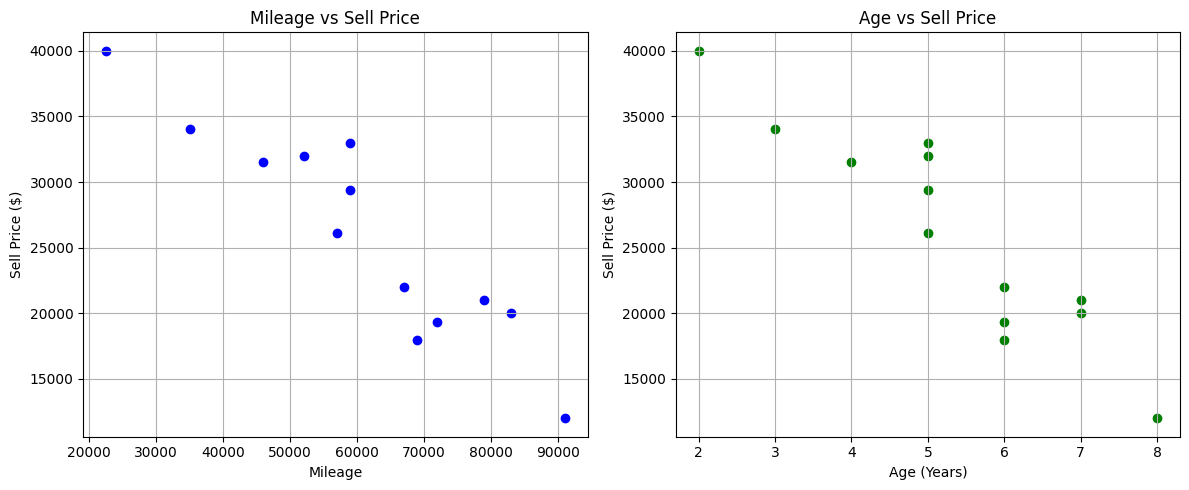

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Mileage vs Price
axs[0].scatter(df['Mileage'], df['Sell Price($)'], color='blue', label='Actual', marker='o')
axs[0].set_title("Mileage vs Sell Price")
axs[0].set_xlabel("Mileage")
axs[0].set_ylabel("Sell Price ($)")
axs[0].grid(True)

# Age vs Price
axs[1].scatter(df['Age(yrs)'], df['Sell Price($)'], color='green', label='Actual', marker='o')
axs[1].set_title("Age vs Sell Price")
axs[1].set_xlabel("Age (Years)")
axs[1].set_ylabel("Sell Price ($)")
axs[1].grid(True)

plt.tight_layout()
plt.show()
